#          WeatherPy

### Analysis

In [1]:
#Dependencies
from citipy import citipy
from config import OWMkey
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import os
import time
from datetime import datetime
import seaborn as sns
import csv
import urllib


In [2]:
#Output File(CSV)
output_data_file = "cities.csv"

#Range of latitudes and longitudes
lat_range = (-90,90)
lng_range = (-180,180)

# Create Cities List

In [3]:
# list for holding lat_lngs and cities
lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2100)
lat_lngs = zip(lats,lngs)

#Indentify nearest city for each lat,lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

759

# Make API Calls

In [4]:
# OpenWeather API Key
from config import OWMkey
skip=0
# Starting URL for Weather MAP API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + OWMkey

#List of City data
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counter
record_count = 1
group_count = 1

#Loop through all the cities in the list
for i, city in enumerate(cities):
    
    #Testing:
    #if(i % 10 == 0 and i >= 10):
        #break  
    
    
    if(i % 60 == 0 ):
        time.sleep(10)         
        
      
    #Getting 700 Records-with skipped should be 500+
    if(i % 700 == 0 and i >= 700):
        break      
    
    
    #City URL
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    #Display Record Number, City Name and URL
    print()
    print("Processing Record No.  %s | City Name:  %s" % (record_count, city))
    print(city_url)
    
    
    #Add 1 to the record count
    record_count += 1
    
    #Run on API request for each of the cities
    try:
        #Retreive Data from JSON
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        converted_city_date = datetime.fromtimestamp(city_date).strftime("%m-%d-%Y")
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "   Lat    ": city_lat,
                          "   Lng    ": city_lng,
                          " Max Temp ": city_max_temp,
                          " Humidity ": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country   ": city_country,
                          "  Date    ": converted_city_date})
    
    #If an error is experienced, skip the city
    except:
        skip=skip+1
        print("City not found. Skipping..."+str(skip))
        
        pass
    #Skip 2 seconds
    time.sleep(1)
#Indicate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------

Processing Record No.  1 | City Name:  mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=mataura

Processing Record No.  2 | City Name:  busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=busselton

Processing Record No.  3 | City Name:  port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=port%20elizabeth

Processing Record No.  4 | City Name:  pauini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=pauini

Processing Record No.  5 | City Name:  nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=nikolskoye

Processing Record No.  6 | City Name:  hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5


Processing Record No.  51 | City Name:  bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=bengkulu
City not found. Skipping...4

Processing Record No.  52 | City Name:  broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=broome

Processing Record No.  53 | City Name:  corner brook
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=corner%20brook

Processing Record No.  54 | City Name:  hvide sande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=hvide%20sande

Processing Record No.  55 | City Name:  butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=butaritari

Processing Record No.  56 | City Name:  clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab26


Processing Record No.  100 | City Name:  gladstone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=gladstone

Processing Record No.  101 | City Name:  derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=derzhavinsk

Processing Record No.  102 | City Name:  ningxiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=ningxiang

Processing Record No.  103 | City Name:  dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=dikson

Processing Record No.  104 | City Name:  garowe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=garowe

Processing Record No.  105 | City Name:  katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=katsuura

Processing Record N


Processing Record No.  149 | City Name:  faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=faanui

Processing Record No.  150 | City Name:  mentok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=mentok
City not found. Skipping...16

Processing Record No.  151 | City Name:  tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=tuktoyaktuk

Processing Record No.  152 | City Name:  san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=san%20cristobal

Processing Record No.  153 | City Name:  gillette
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=gillette

Processing Record No.  154 | City Name:  coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab4


Processing Record No.  199 | City Name:  lephepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=lephepe
City not found. Skipping...21

Processing Record No.  200 | City Name:  hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=hambantota

Processing Record No.  201 | City Name:  makakilo city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=makakilo%20city

Processing Record No.  202 | City Name:  east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=east%20london

Processing Record No.  203 | City Name:  dujuma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=dujuma
City not found. Skipping...22

Processing Record No.  204 | City Name:  ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperia


Processing Record No.  249 | City Name:  kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=kaitangata

Processing Record No.  250 | City Name:  attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=attawapiskat
City not found. Skipping...25

Processing Record No.  251 | City Name:  ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=ostrovnoy

Processing Record No.  252 | City Name:  ban nahin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=ban%20nahin

Processing Record No.  253 | City Name:  sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=sorong

Processing Record No.  254 | City Name:  kosmynino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab2


Processing Record No.  299 | City Name:  sedro-woolley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=sedro-woolley

Processing Record No.  300 | City Name:  niquero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=niquero

Processing Record No.  301 | City Name:  eenhana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=eenhana

Processing Record No.  302 | City Name:  grand-santi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=grand-santi

Processing Record No.  303 | City Name:  cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=cayenne

Processing Record No.  304 | City Name:  mandiana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=mandiana

Processing 


Processing Record No.  349 | City Name:  saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=saleaula
City not found. Skipping...30

Processing Record No.  350 | City Name:  tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=tomatlan

Processing Record No.  351 | City Name:  tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=tuatapere

Processing Record No.  352 | City Name:  gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=gat

Processing Record No.  353 | City Name:  umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=umzimvubu
City not found. Skipping...31

Processing Record No.  354 | City Name:  pestyaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1


Processing Record No.  400 | City Name:  herzberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=herzberg

Processing Record No.  401 | City Name:  ocampo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=ocampo

Processing Record No.  402 | City Name:  duldurga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=duldurga

Processing Record No.  403 | City Name:  shirokiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=shirokiy

Processing Record No.  404 | City Name:  shieli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=shieli

Processing Record No.  405 | City Name:  caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=caravelas

Processing Record No.  406 


Processing Record No.  450 | City Name:  kasempa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=kasempa

Processing Record No.  451 | City Name:  sal rei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=sal%20rei

Processing Record No.  452 | City Name:  palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=palmer

Processing Record No.  453 | City Name:  samfya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=samfya

Processing Record No.  454 | City Name:  tamandare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=tamandare

Processing Record No.  455 | City Name:  shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=shingu

Processing Record No.  456 | City


Processing Record No.  500 | City Name:  allonnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=allonnes

Processing Record No.  501 | City Name:  bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=bubaque

Processing Record No.  502 | City Name:  labytnangi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=labytnangi

Processing Record No.  503 | City Name:  sturgeon falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=sturgeon%20falls

Processing Record No.  504 | City Name:  turayf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=turayf

Processing Record No.  505 | City Name:  ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=ilulissat

Process


Processing Record No.  550 | City Name:  tahoua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=tahoua

Processing Record No.  551 | City Name:  hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=hualmay

Processing Record No.  552 | City Name:  juneau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=juneau

Processing Record No.  553 | City Name:  yabrud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=yabrud

Processing Record No.  554 | City Name:  halalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=halalo
City not found. Skipping...47

Processing Record No.  555 | City Name:  fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=fairbanks

Process


Processing Record No.  599 | City Name:  rio branco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=rio%20branco

Processing Record No.  600 | City Name:  dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=dwarka

Processing Record No.  601 | City Name:  karatau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=karatau

Processing Record No.  602 | City Name:  churumuco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=churumuco
City not found. Skipping...54

Processing Record No.  603 | City Name:  redcar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=redcar

Processing Record No.  604 | City Name:  inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=in


Processing Record No.  649 | City Name:  isla vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=isla%20vista

Processing Record No.  650 | City Name:  zhezkazgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=zhezkazgan

Processing Record No.  651 | City Name:  narang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=narang

Processing Record No.  652 | City Name:  sterling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=sterling

Processing Record No.  653 | City Name:  mitsamiouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=mitsamiouli

Processing Record No.  654 | City Name:  meyungs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=meyungs
City not fou


Processing Record No.  699 | City Name:  pyryatyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=pyryatyn

Processing Record No.  700 | City Name:  pimenteiras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14ac49b5c9e1c8fc43ab267ab462e621&q=pimenteiras
----------------------------
Data Retrieval Complete     
----------------------------


# Create The Dataframe

In [5]:
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the dataframe
lats = city_data_pd["   Lat    "]
longs = city_data_pd["   Lng    "]
max_temps = city_data_pd[" Max Temp "]
humidity = city_data_pd[" Humidity "]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Create The CSV file

In [6]:
city_data_pd.to_csv(output_data_file, index_label="City_ID", sep=",", encoding='utf-8')

In [7]:
#Record Count
city_data_pd.count()

   Lat        638
   Lng        638
  Date        638
 Humidity     638
 Max Temp     638
City          638
Cloudiness    638
Country       638
Wind Speed    638
dtype: int64

# Latitude Vs Longitude

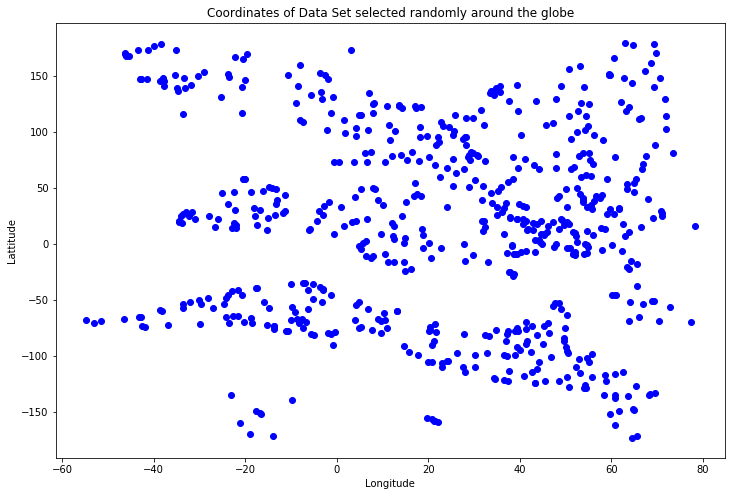

In [14]:
# This is to plot uniformity of the data by diagram: Latitude Vs Longitude
plt.figure(figsize=(12,8))

plt.scatter(x=lats,y = longs, c='blue')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.title('Coordinates of Data Set selected randomly around the globe')

# Save plot of Coordinates of Data Set selected randomly with Lat and long
plt.savefig("CCoord_of_data.png")
plt.show()

# Latitude vs. Max Temperature

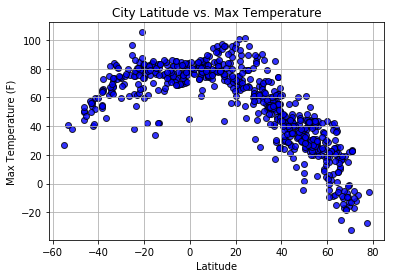

In [15]:
# latitude vs. Max Temperature
plt.scatter(lats,
            max_temps,
            color="blue",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Add Chart Labels
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Plot
plt.savefig("ClatvMTemp.png")

#Show Plot
plt.show()

# Latitude vs. Humidity

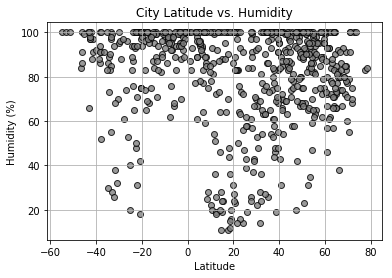

In [24]:
# latitude vs. Humidity
plt.scatter(lats,
            humidity,
            color="grey",
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

# Add Chart Labels
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Plot
plt.savefig("ClatvHum.png")

# Show Plot
plt.show()

# Latitude vs. Cloudiness

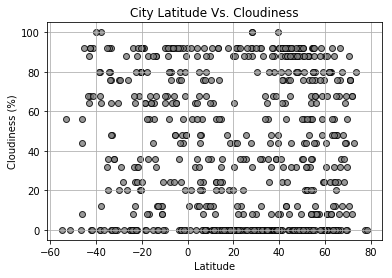

In [25]:
# Latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
            color="grey", 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

# Add Chart Labels
plt.title("City Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Plot
plt.savefig("ClatvCLoud.png")

#Show Plot
plt.show()

# Latitude vs. Wind Speed

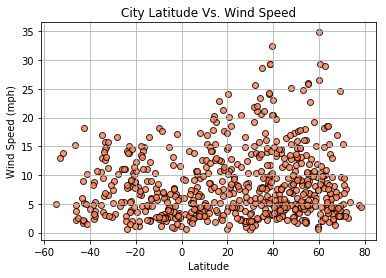

In [26]:
# Latitude vs. Wind Speed
plt.scatter(lats,
            wind_speed,
            color="coral",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Add Chart Labels
plt.title("City Latitude Vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("ClatvCWind.png")

#Show Plot
plt.show()

In [27]:
pwd

'C:\\Users\\Toncus\\Desktop\\PythonAPIsHW'